In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter
from pprint import pprint

from pathlib import Path
import seaborn as sns
import scipy.stats as ss

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

from sklearn.svm import SVC

In [2]:
# initial source: https://github.com/rohanML/home_credit_default_risk/blob/master/notebooks/02_Exploratory_Data_Analysis.ipynb

#To track modified features : 
# eg combine levels with few records into one level called 'Others'

modified_features = dict()

# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df

# to save plots
p = Path.cwd().parent / 'Wine Project' / 'reports' / 'figures'
suffix ='.pdf'

In [3]:
### Opening CSV files for both Red and White wines

In [4]:
raw_red_df = pd.read_csv('winequality-red.csv', header= 0, delimiter= ";")
raw_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
raw_white_df = pd.read_csv('winequality-white.csv', header= 0, delimiter= ";")
raw_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
### Red EDA

In [7]:
raw_red_df.shape

(1599, 12)

In [8]:
raw_red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
raw_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
raw_red_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
red_col = raw_red_df.columns
red_col = red_col.drop('quality')
red_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [12]:
def plot_eda(col_name, df, color):
    
    """ Description: To take in numeric data column and plot them vs quality 
        
        input: col_name: array of column name for the df excluding outcome variable
               df: dataframe that has the numeric data with the quality
    
        output: a plot for the relationship between the column and quality"""
    fig = plt.figure(figsize = (10,6))
    title = color + ' wine quality vs '+ col_name
    sns.barplot(x = 'quality', y= col_name, data = df).set(title=title)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )
    return

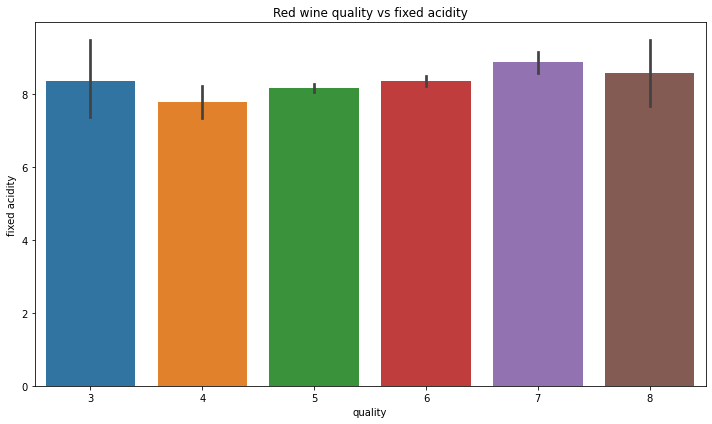

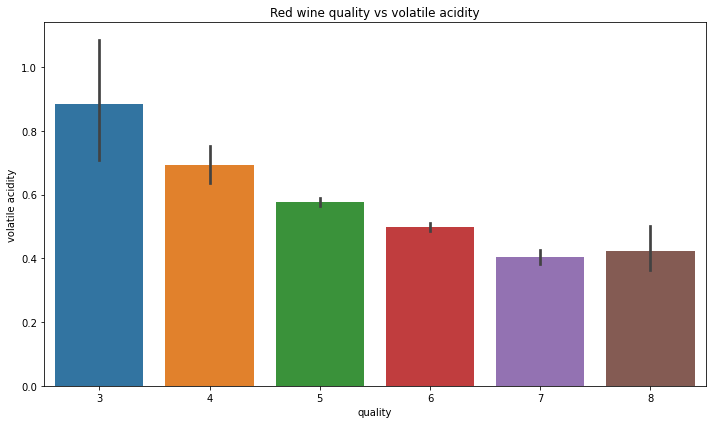

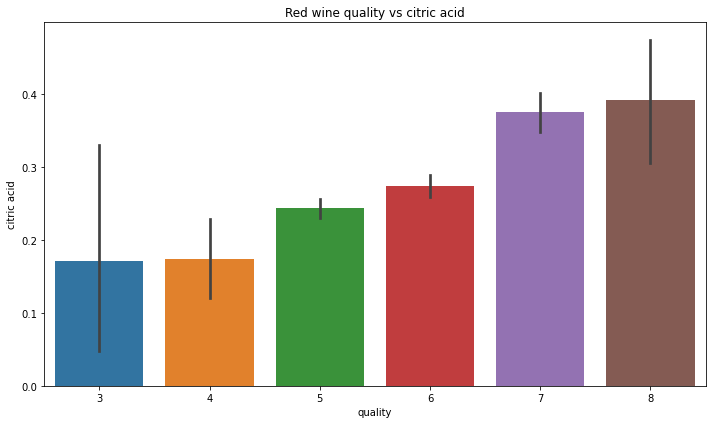

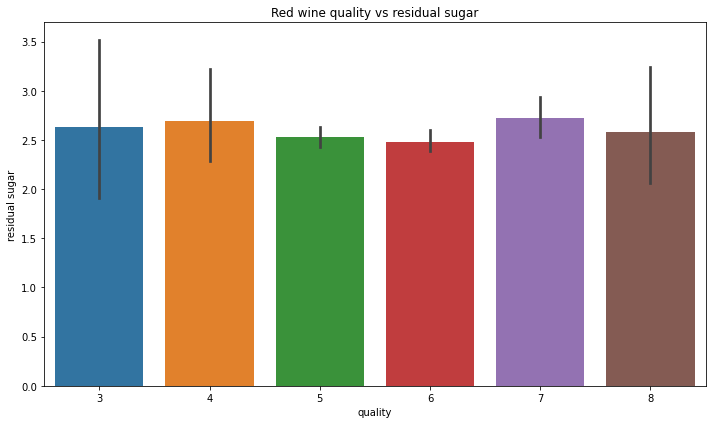

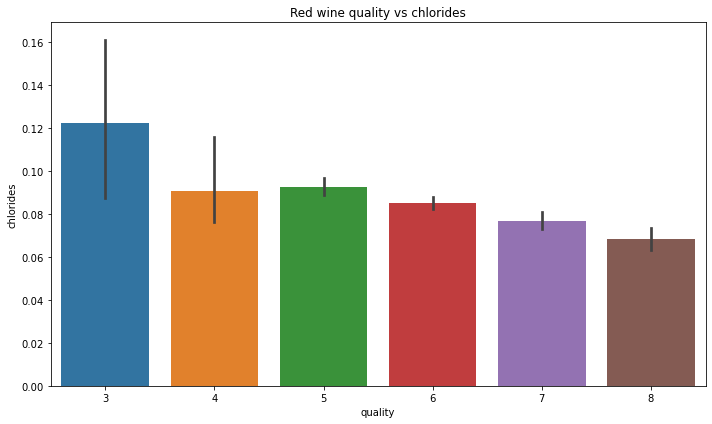

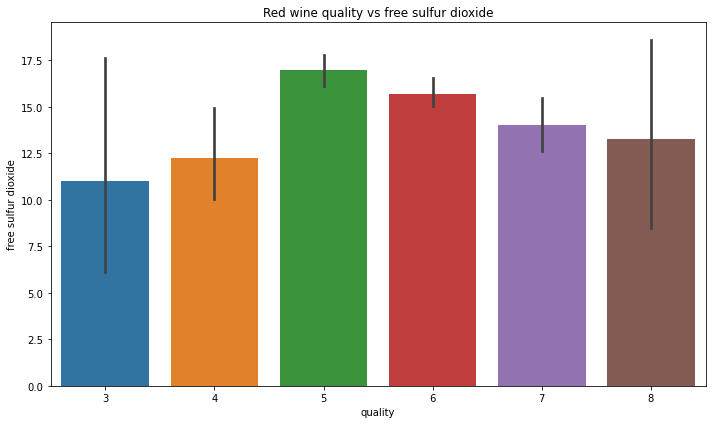

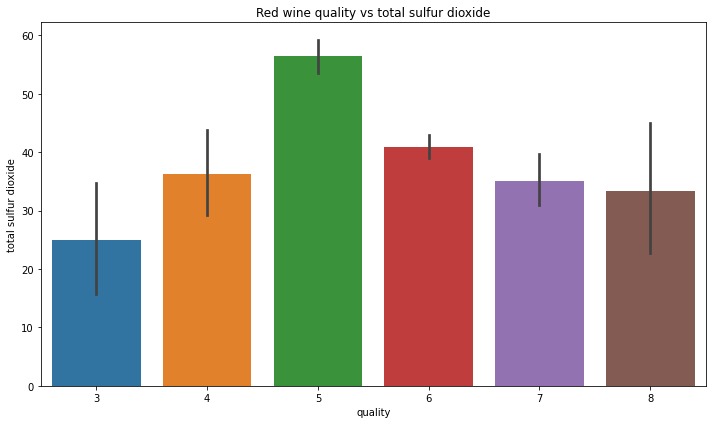

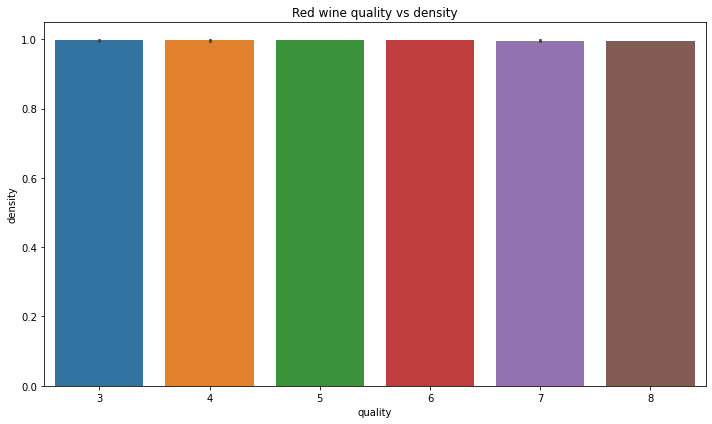

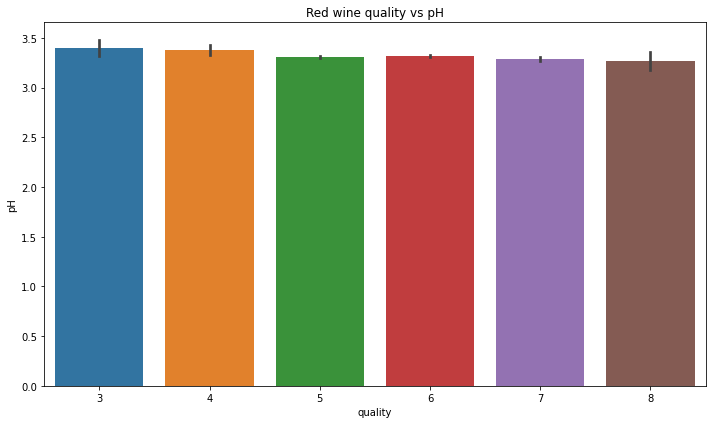

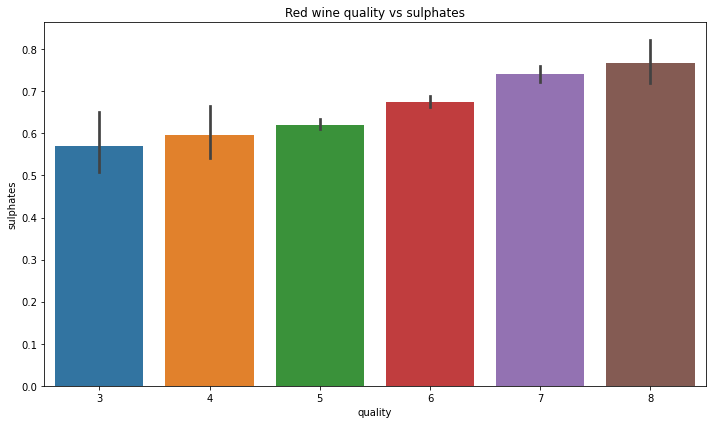

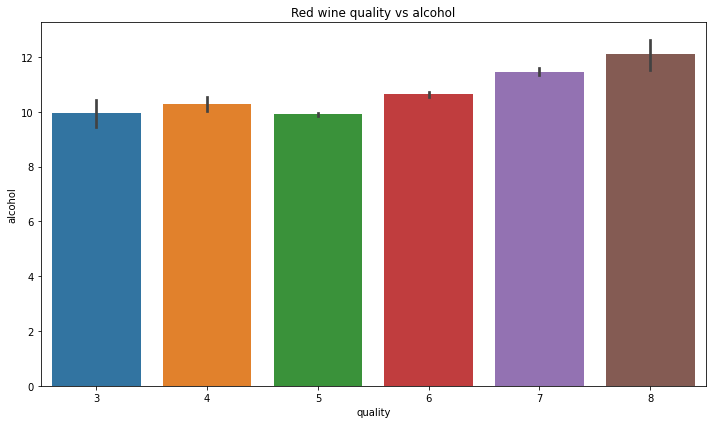

In [13]:
# plot each column vs quality of wine
for rc in red_col:
    plot_eda(rc, raw_red_df, "Red")

In [14]:
### white EDA

In [15]:
raw_white_df.shape

(4898, 12)

In [16]:
raw_white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
raw_white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
raw_white_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [19]:
white_col = raw_white_df.columns
white_col = white_col.drop('quality')
white_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

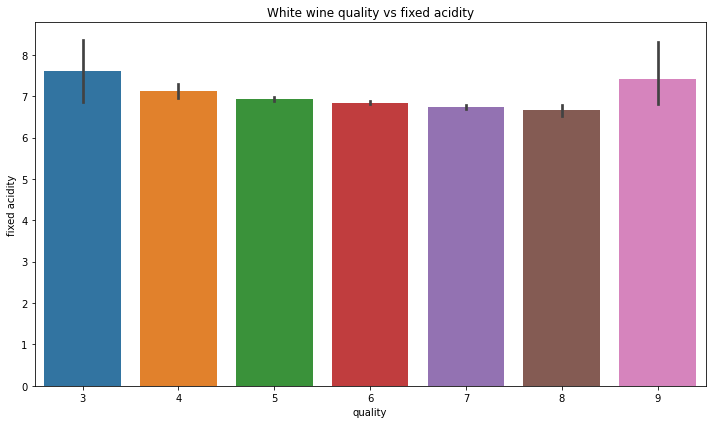

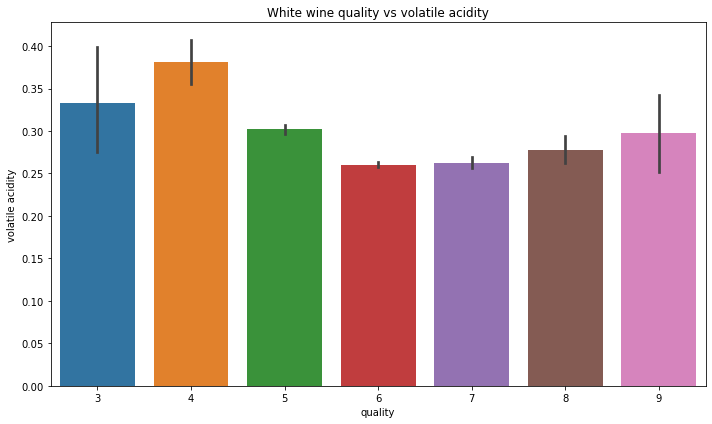

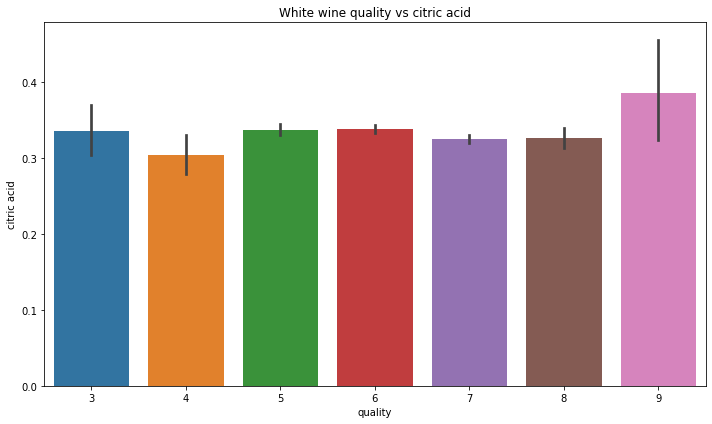

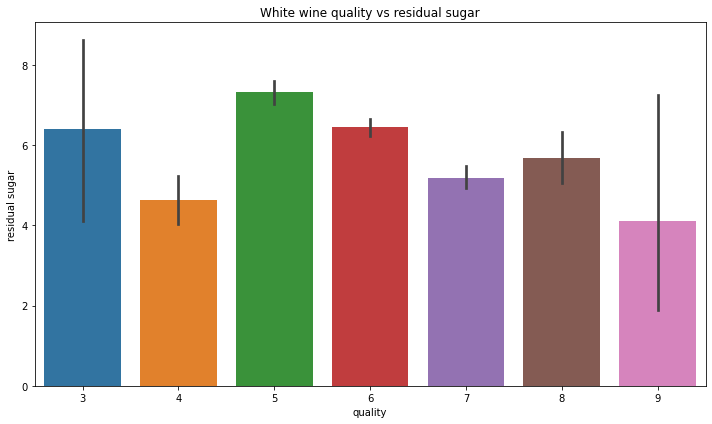

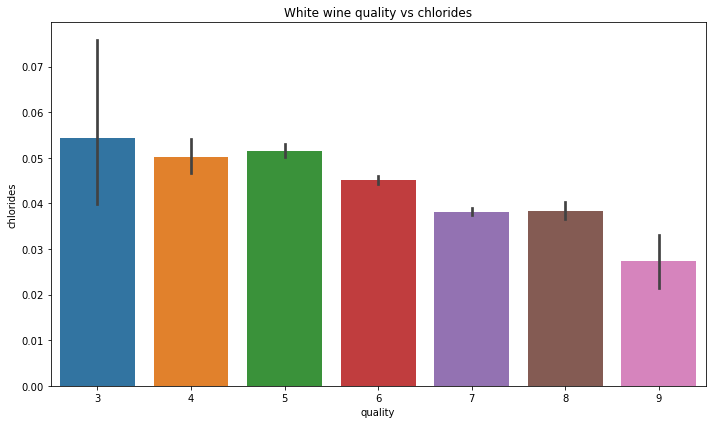

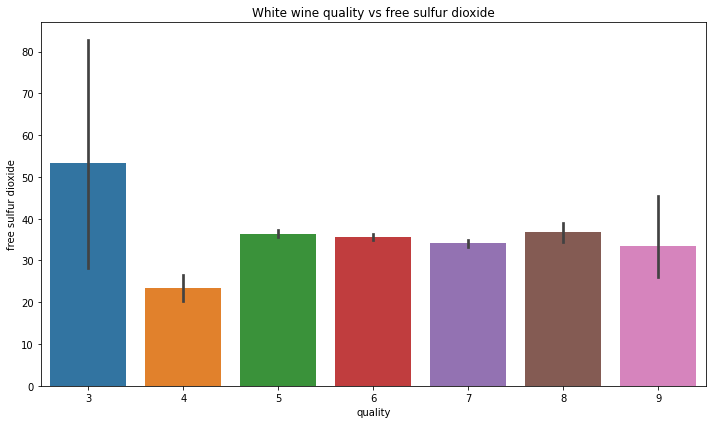

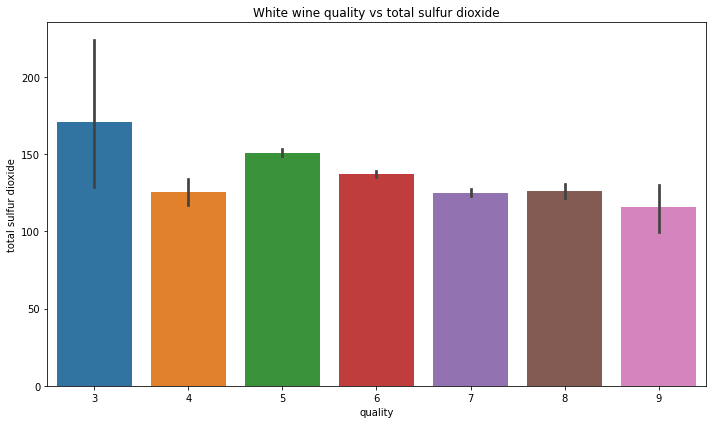

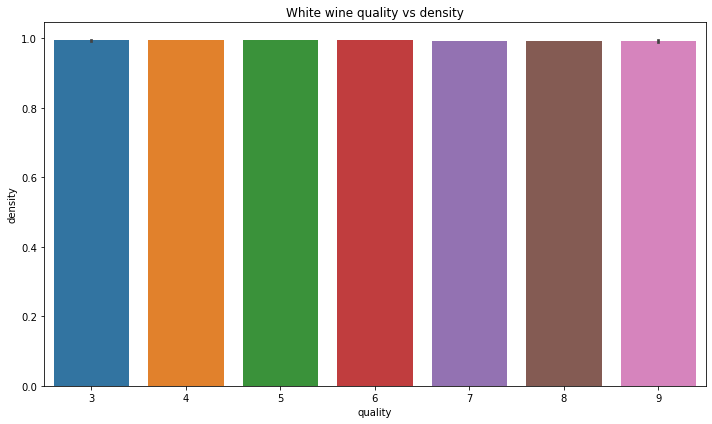

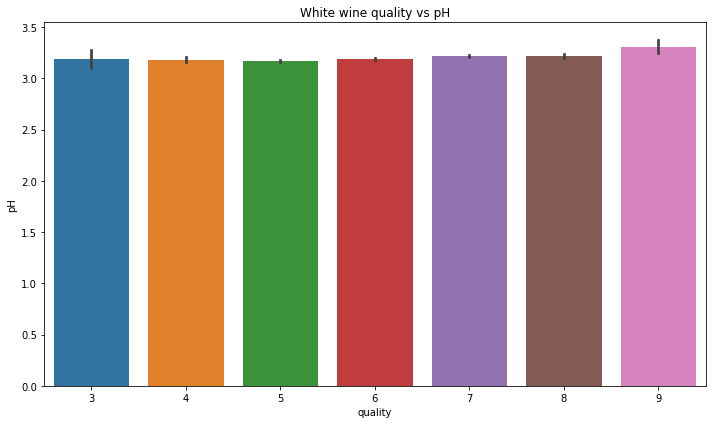

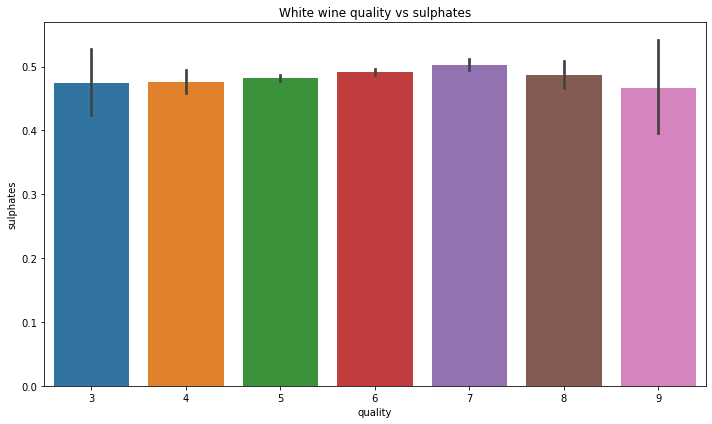

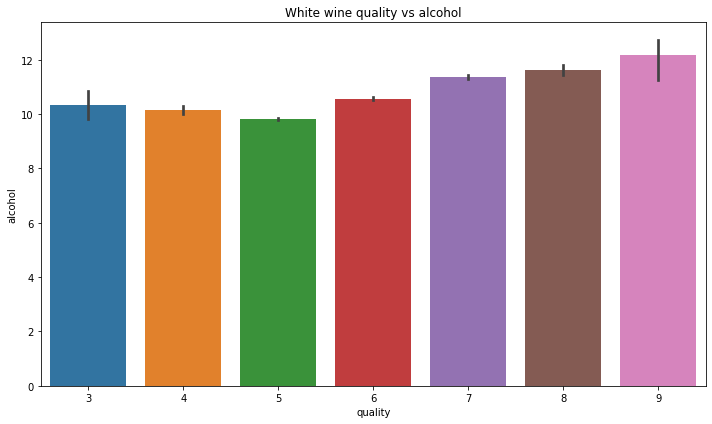

In [20]:
# plot each column vs quality of wine
for wc in red_col:
    plot_eda(wc, raw_white_df, "White")

In [21]:
# Preprocess

In [22]:
bins = (1, 6.5, 10)
qual = ['bad', 'good']
label_quality = preprocessing.LabelEncoder()

In [23]:
red_data = raw_red_df
red_data['quality'] = pd.cut(red_data['quality'], bins=bins, labels=qual)
red_data['quality'] = label_quality.fit_transform(red_data['quality'])
red_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [24]:
white_data = raw_white_df
white_data['quality'] = pd.cut(white_data['quality'], bins=bins, labels=qual)
white_data['quality'] = label_quality.fit_transform(white_data['quality'])
white_data['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [25]:
def plot_countplot(data, color):
    sns.countplot(x='quality',data = data, alpha=0.5)
    plt.xlabel(color + ' Wine Quality')
    plt.ylabel('Counts')
    title = color + ' Wine Quality'
    plt.title(title);
    print('{}% of the {} wines are good'.format(round(data.quality.mean(),5)*100, str.lower(color)))
    plt.savefig(p / (title +'_count.pdf') )
    return

In [26]:
#making a pi chart for the report
def plot_piplot(data, color):
    acc_rate = round(data.quality.mean(), 4)*100
    labels = 'Good', 'Bad'
    sizes = [acc_rate, 100-(acc_rate)]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0)
    ax1.axis('equal')

    title = "Quality of " + color + " Wine"
    ax1.set_title(title)
    plt.savefig(p / (title+'.pdf') )
    plt.show()
    return

13.571% of the red wines are good


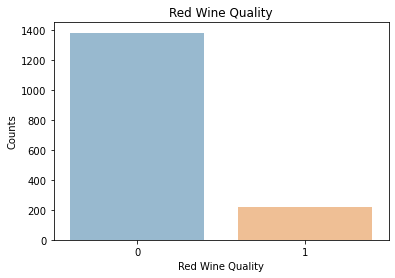

In [27]:
plot_countplot(red_data, "Red")

21.641% of the white wines are good


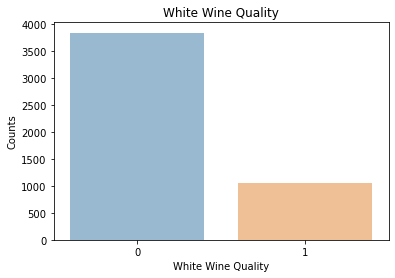

In [28]:
plot_countplot(white_data, 'White')

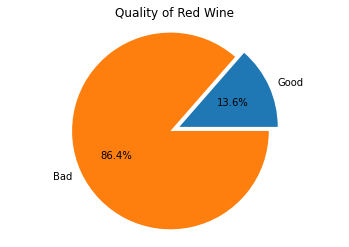

In [29]:
plot_piplot(red_data, "Red")

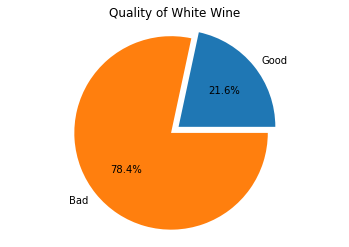

In [30]:
plot_piplot(white_data, 'White')

In [31]:
num_col = red_col
cat_col = ['quality']

In [32]:
# original source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [33]:
# initial source: https://github.com/ithisted/PetAdoptionPrediction/blob/master/PetAdoptionPrediction.ipynb
def plot_heatmap(data, color):
    columns = data.columns
    corr = pd.DataFrame(index=columns, columns=columns)

    for i in range(0, len(columns)):
        for j in range(i, len(columns)):

                if i == j:
                    corr_factor = 1.0

                elif (columns[i] in num_col) and (columns[j] in num_col):
                    corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                    #if pvalue > 0.05:
                        #corr_factor = np.nan

                elif (columns[i] in num_col) and (columns[j] in cat_col):
                    corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                    #if pvalue > 0.05:
                        #corr_factor = np.nan
                    
                elif (columns[i] in cat_col) and (columns[j] in num_col):
                    corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
                    #if pvalue > 0.05:
                        #corr_factor = np.nan

                corr.loc[columns[j],columns[i]] = corr_factor

    corr.fillna(value=np.nan,inplace=True)
    plt.figure(figsize=(20,10))
    sns.set(font_scale=1.8) 
    title = color + ' Wine Heatmap'
    sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16}).set(title = title)
    plt.tight_layout()
    plt.savefig(p / (color +' wine heatmap.pdf') )
    plt.show()    
    return

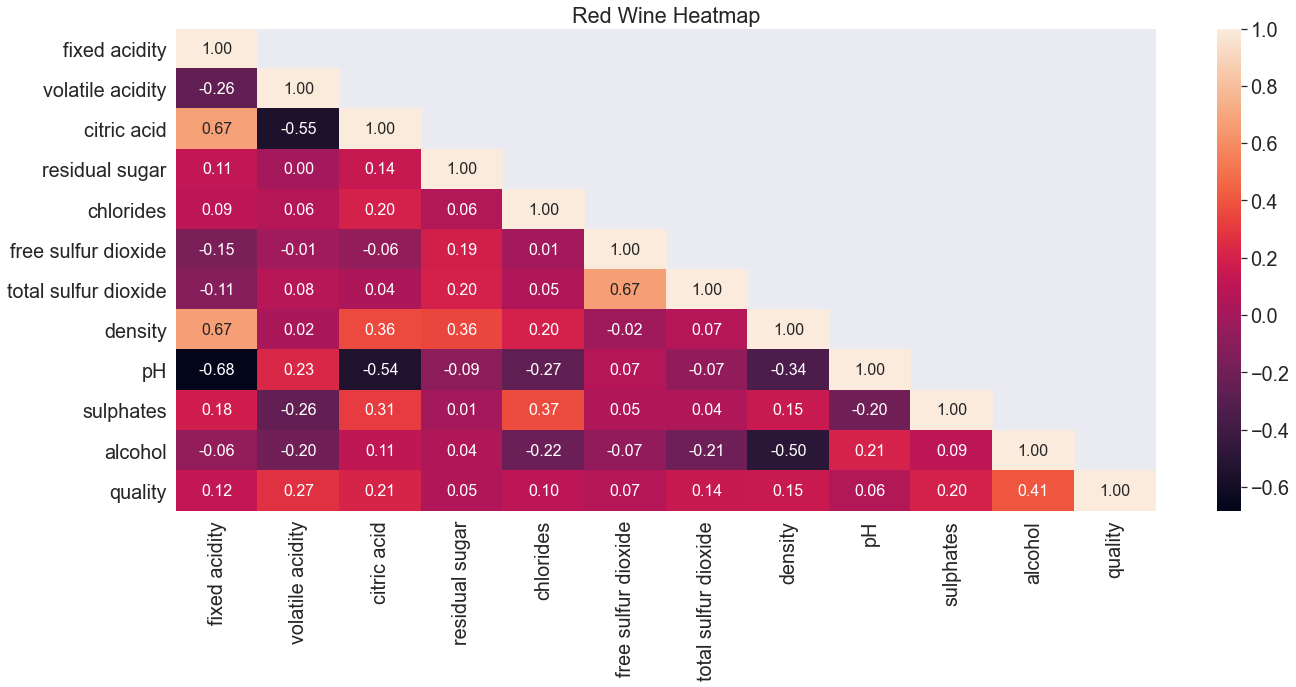

In [34]:
plot_heatmap(red_data, "Red")

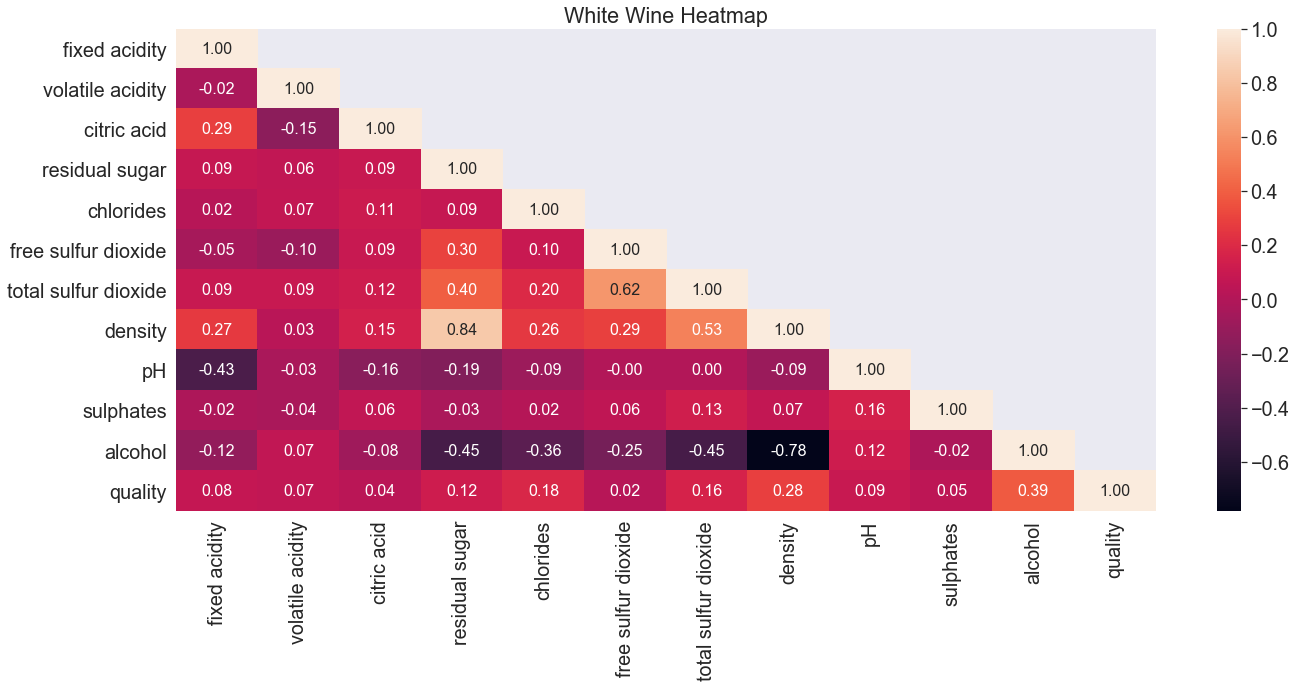

In [35]:
plot_heatmap(white_data, "White")

In [36]:
### separating into response vs feature variables

In [37]:
#adding a random column for a baseline on feature importances

red_data['random'] = np.random.random(size = red_data.shape[0])
white_data['random'] = np.random.random(size = white_data.shape[0])

In [38]:
Xr = red_data.drop('quality', axis=1)
yr = red_data['quality']

Xw = white_data.drop('quality', axis=1)
yw = white_data['quality']

sc = preprocessing.StandardScaler()

In [39]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.25, random_state= 42)

In [40]:
features_to_encode = Xr_train.columns[Xr_train.dtypes==object].tolist()  

In [41]:
Xr_train = sc.fit_transform(Xr_train)
Xr_test = sc.fit_transform(Xr_test)

In [42]:
Xr_train

array([[ 1.97418149, -0.23260309,  1.11458849, ..., -1.3131938 ,
        -1.15257747,  0.96722797],
       [ 0.28189382,  0.37802632,  0.09088663, ..., -0.97064635,
        -1.24703683,  0.11007524],
       [-0.71013687,  0.32251456, -1.39348108, ..., -0.62809889,
         1.01998773,  1.24919598],
       ...,
       [-0.65178213,  0.48904985, -1.08637052, ..., -0.68519014,
        -0.8691994 , -0.33695404],
       [-0.2432989 , -1.84244427,  0.39799719, ...,  0.79918216,
         1.39782516,  1.09820046],
       [-1.46874859, -1.34283839, -0.06266865, ..., -0.68519014,
         2.90917487,  0.24291401]])

In [43]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.25, random_state= 42)

In [44]:
Xw_train = sc.fit_transform(Xw_train)
Xw_test = sc.fit_transform(Xw_test)

## feature importance of Red wine data set

In [45]:
rfc_r = RFC(n_estimators=200)
rfc_r.fit(Xr_train, yr_train)
yr_pred_rfc = rfc_r.predict(Xr_test)

In [46]:
print(classification_report(yr_test, yr_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.67      0.34      0.45        53

    accuracy                           0.89       400
   macro avg       0.79      0.66      0.69       400
weighted avg       0.87      0.89      0.87       400



In [47]:
print(confusion_matrix(yr_test, yr_pred_rfc))

[[338   9]
 [ 35  18]]


In [48]:
accuracy_score(yr_test, yr_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(yr_test,yr_pred_rfc),4)*100} %")

The accuracy of the model is 89.0 %


In [49]:
train_probs = rfc_r.predict_proba(Xr_train)[:,1] 
probs = rfc_r.predict_proba(Xr_test)[:, 1]
train_predictions = rfc_r.predict(Xr_train)

In [50]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.923712685552716


In [51]:
def evaluate_model(y_pred, y_test, y_train, probs ,train_predictions, train_probs, title_name):
    baseline = {}
    baseline['recall']=recall_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test,
                    [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    for metric in ['recall', 'precision', 'roc']:  
        print(f'''{metric.capitalize()}
            Baseline: {round(baseline[metric], 2)}
            Test: {round(results[metric], 2)}
            Train: {round(train_results[metric], 2)}''')
            
     # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves: '+ title_name);
    plt.tight_layout()
    plt.savefig(p / (title_name +'.pdf') )
    plt.show();
    return

Recall
            Baseline: 1.0
            Test: 0.34
            Train: 1.0
Precision
            Baseline: 0.13
            Test: 0.67
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


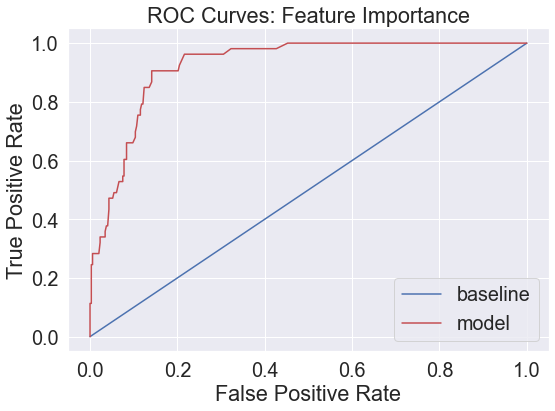

In [52]:
evaluate_model(yr_pred_rfc, yr_test, yr_train, probs, train_predictions, train_probs, title_name="Feature Importance")

In [53]:
confusion_matrix(yr_test, yr_pred_rfc, normalize='all')

array([[0.845 , 0.0225],
       [0.0875, 0.045 ]])

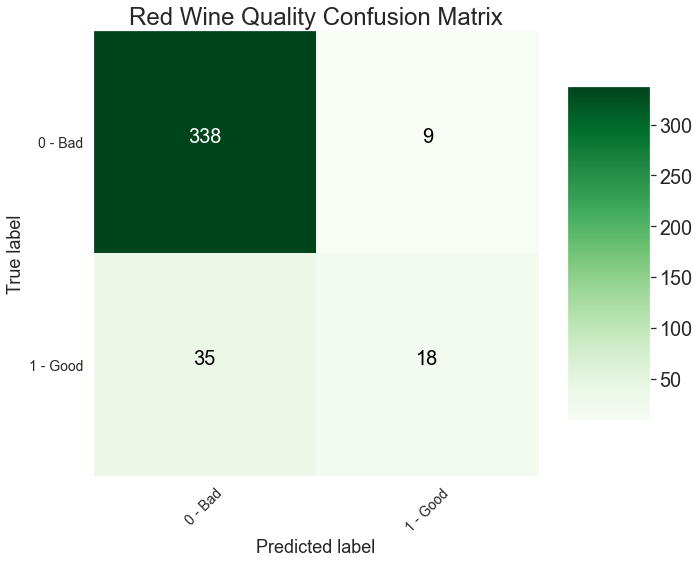

In [54]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )
    
# Let's plot
cm = confusion_matrix(yr_test, yr_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Red' + ' Wine Quality Confusion Matrix')

Random Forest Feature Importance

In [55]:
print(rfc_r.feature_importances_)
print(f" There are {len(rfc_r.feature_importances_)} features in total")

[0.06480032 0.11270514 0.08027303 0.06796424 0.06924355 0.05961907
 0.07542124 0.0874542  0.05285357 0.11474325 0.15709451 0.05782788]
 There are 12 features in total


In [56]:
rfc_r.feature_importances_

array([0.06480032, 0.11270514, 0.08027303, 0.06796424, 0.06924355,
       0.05961907, 0.07542124, 0.0874542 , 0.05285357, 0.11474325,
       0.15709451, 0.05782788])

In [57]:
rcol_names = Xr.columns
feature_importances_r = list(zip(rcol_names, rfc_r.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_r_ranked = sorted(feature_importances_r, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
feature_importances_r

[('fixed acidity', 0.06480031873193813),
 ('volatile acidity', 0.11270513980652871),
 ('citric acid', 0.0802730274119886),
 ('residual sugar', 0.06796424280374412),
 ('chlorides', 0.06924354619358696),
 ('free sulfur dioxide', 0.05961906826346836),
 ('total sulfur dioxide', 0.07542124187079682),
 ('density', 0.0874542044620397),
 ('pH', 0.052853570548230415),
 ('sulphates', 0.11474325013011591),
 ('alcohol', 0.157094512808661),
 ('random', 0.05782787696890143)]

In [58]:
# Plot the top 25 feature importance
def plot_feature_importance(feature_importances_ranked, color):
    feature_names_ = [i[0] for i in feature_importances_ranked[:20]]
    y_ticks = np.arange(0, len(feature_names_))
    x_axis = [i[1] for i in feature_importances_ranked[:16]]
    plt.figure(figsize = (10, 12))
    plt.barh(feature_names_, x_axis)   #horizontal barplot
    plt.title(color + ' Wine Feature Importance (Random Forest)',
              fontdict= {'fontsize' : 20})
    plt.xlabel('Features',fontdict= {'fontsize' : 16})
    plt.tight_layout()
    plt.savefig(p / (color + ' Random Forest Feature Importance.pdf') )
    plt.show()

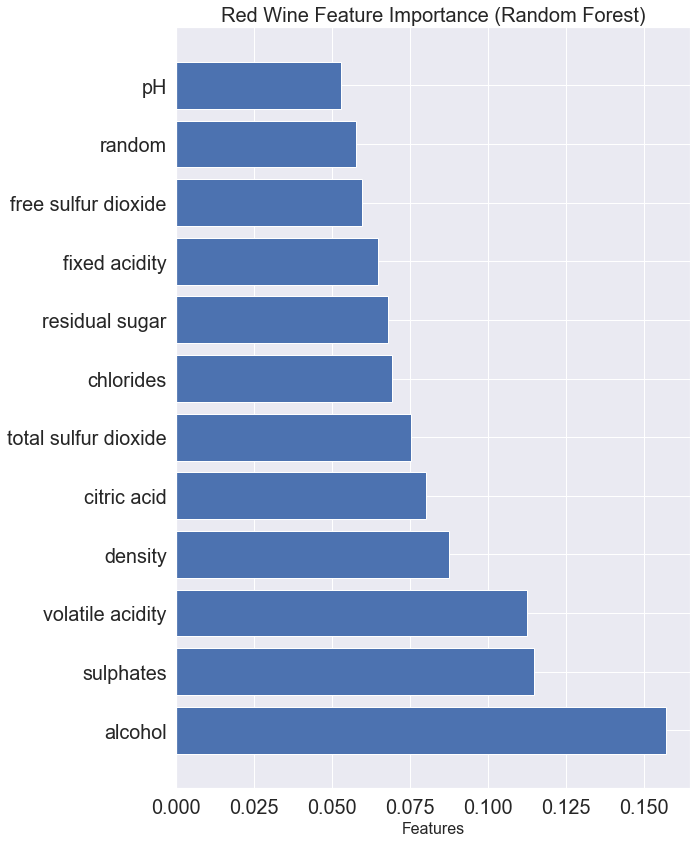

In [59]:
plot_feature_importance(feature_importances_r_ranked, "Red")

In [60]:
## feature importance of White wine data set

In [61]:
rfc_w = RFC(n_estimators=200)
rfc_w.fit(Xw_train, yw_train)
yw_pred_rfc = rfc_w.predict(Xw_test)

In [62]:
print(classification_report(yw_test, yw_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       941
           1       0.84      0.57      0.68       284

    accuracy                           0.88      1225
   macro avg       0.86      0.77      0.80      1225
weighted avg       0.87      0.88      0.87      1225



In [63]:
print(confusion_matrix(yw_test, yw_pred_rfc))

[[911  30]
 [121 163]]


In [64]:
accuracy_score(yw_test, yw_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(yw_test,yw_pred_rfc),4)*100} %")

The accuracy of the model is 87.67 %


In [65]:
train_probs = rfc_w.predict_proba(Xw_train)[:,1] 
probs = rfc_w.predict_proba(Xw_test)[:, 1]
train_predictions = rfc_w.predict(Xw_train)

In [66]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9138091032913742


Recall
            Baseline: 1.0
            Test: 0.57
            Train: 1.0
Precision
            Baseline: 0.23
            Test: 0.84
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.91
            Train: 1.0


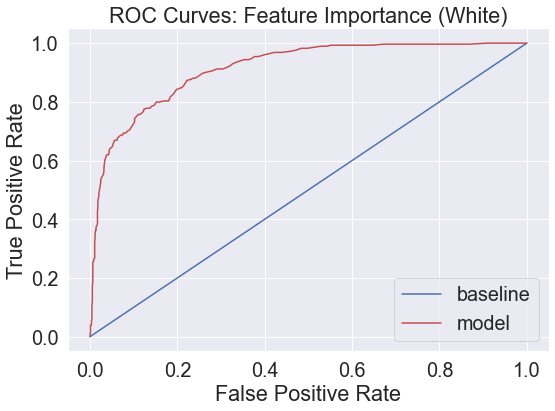

In [67]:
evaluate_model(yw_pred_rfc, yw_test, yw_train, probs, train_predictions, train_probs, title_name="Feature Importance (White)")

In [68]:
confusion_matrix(yw_test, yw_pred_rfc, normalize='all')

array([[0.74367347, 0.0244898 ],
       [0.09877551, 0.13306122]])

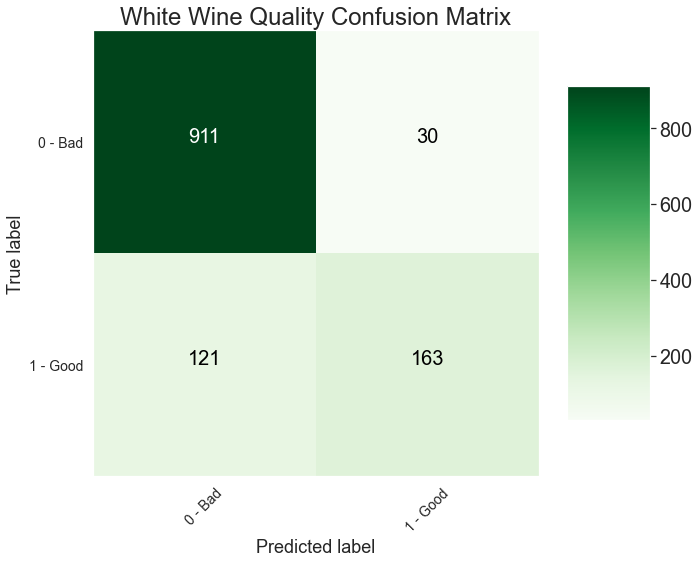

In [69]:
cm = confusion_matrix(yw_test, yw_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'White' + ' Wine Quality Confusion Matrix')

Random Forest Feature Importance

In [70]:
print(rfc_w.feature_importances_)
print(f" There are {len(rfc_w.feature_importances_)} features in total")

[0.06190627 0.07806054 0.06648044 0.07997129 0.08461414 0.07563543
 0.07766813 0.11949023 0.08512688 0.07185055 0.13762296 0.06157314]
 There are 12 features in total


In [71]:
wcol_names = Xw.columns
feature_importances_w = list(zip(wcol_names, rfc_w.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_w_ranked = sorted(feature_importances_w, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
feature_importances_w

[('fixed acidity', 0.061906271449936864),
 ('volatile acidity', 0.07806053641722287),
 ('citric acid', 0.06648043797970174),
 ('residual sugar', 0.07997129253857135),
 ('chlorides', 0.08461413622662028),
 ('free sulfur dioxide', 0.07563543461906042),
 ('total sulfur dioxide', 0.07766812569653438),
 ('density', 0.11949022678297148),
 ('pH', 0.08512688301627257),
 ('sulphates', 0.07185055038778046),
 ('alcohol', 0.13762296356183576),
 ('random', 0.06157314132349184)]

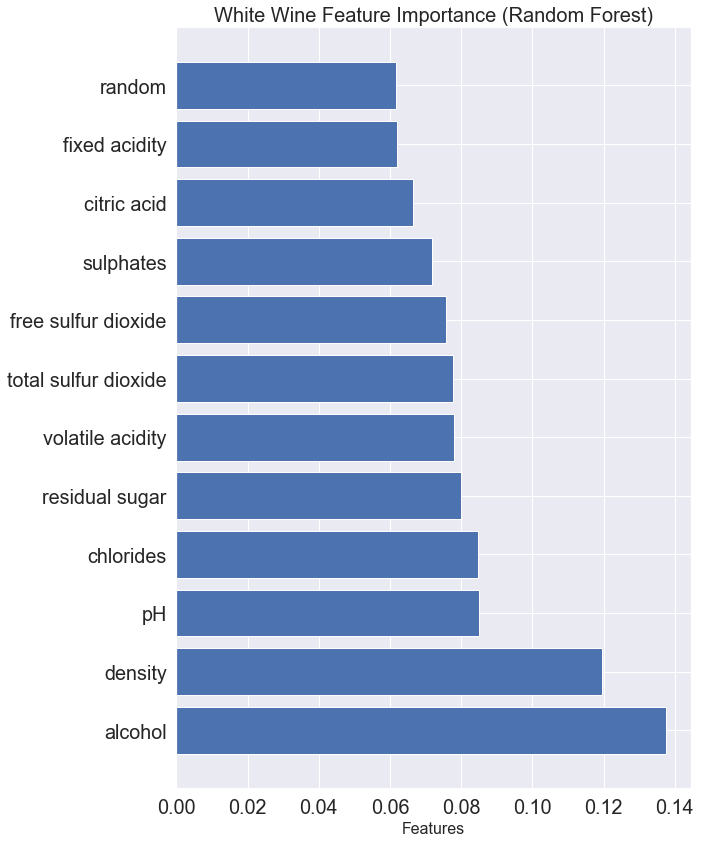

In [72]:
plot_feature_importance(feature_importances_w_ranked, "White")

In [73]:
## optimization of classifiers for Red Wine

In [74]:
### random forest grid search

In [75]:
rfc_r = RFC(oob_score=True)
rfc_r.fit(Xr_train, yr_train)
yr_pred_rfc = rfc_r.predict(Xr_test)

In [76]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(rfc_r.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [77]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)]
max_features = ['auto', 'log2']  # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]   # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # Minimum number of samples required to split a node
min_samples_leaf = [1, 4, 10]    # Minimum number of samples required at each leaf node
bootstrap = [True]       # Method of selecting samples for training each tree

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': [None] + list(np.linspace(10, 50, 3).astype(int)),
               'n_jobs' : [4], 
               'bootstrap': bootstrap}

In [78]:
# Create random search model and fit the data
rf_grid_r = GridSearchCV(
                        estimator = rfc_r,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid_r.fit(Xr_train, yr_train)
rf_grid_r.best_params_
rf_grid_r.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 26.8min finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 275,
 'n_jobs': 4}

In [79]:
# Use the best model after tuning
best_rf_model_r = rf_grid_r.best_estimator_
best_rf_model_r.fit(Xr_train, yr_train)
yr_pred_best_rf_model = best_rf_model_r.predict(Xr_test)
pprint(best_rf_model_r.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 275,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Recall
            Baseline: 1.0
            Test: 0.34
            Train: 1.0
Precision
            Baseline: 0.13
            Test: 0.62
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


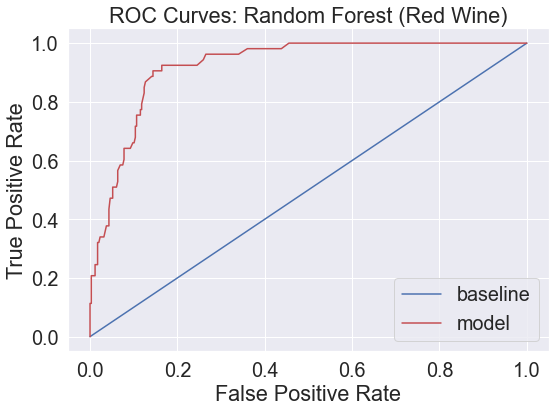

In [80]:
train_rf_predictions_r = best_rf_model_r.predict(Xr_train)
train_rf_probs_r = best_rf_model_r.predict_proba(Xr_train)[:, 1]
rf_probs_r = best_rf_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_rf_model, yr_test, yr_train,rf_probs_r, train_rf_predictions_r, train_rf_probs_r, title_name="Random Forest (Red Wine)")

In [81]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_rf_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, rf_probs_r)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.922570822685009


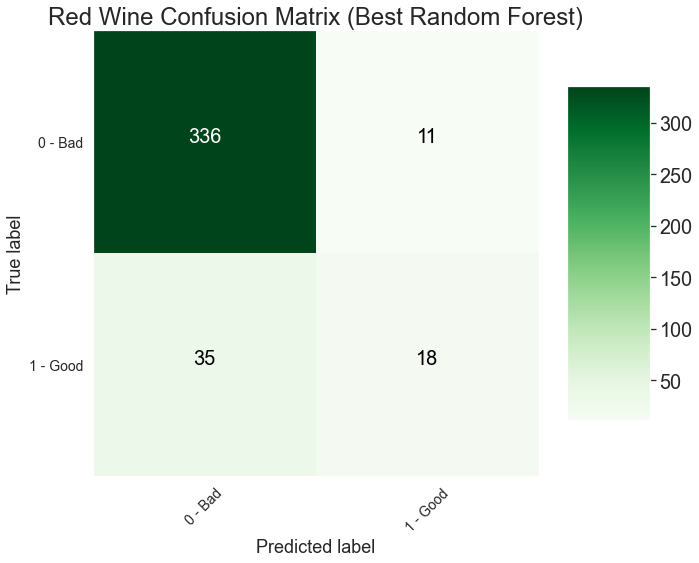

In [82]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_rf_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best Random Forest)')

In [83]:
### Stochastic Gradient Decent grid search

In [84]:
sgd_r = SGDC()
sgd_r.fit(Xr_train, yr_train)
yr_pred_sgd = sgd_r.predict(Xr_test)

In [85]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(sgd_r.get_params())

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [86]:
loss = ['hinge', 'log']
alpha = list(np.logspace(-5, -1, 5).astype(float))
epsilon = list(np.linspace(0.001, 0.5, 6).astype(float))
max_iter = list(np.logspace(3, 6, 4).astype(float))
l1_ratio = list(np.linspace(0.1, 0.5, 5).astype(float))

sgd_grid = {'loss': loss,
             'alpha': alpha,
             'epsilon': epsilon,
             'l1_ratio': l1_ratio,
             'max_iter': max_iter,
             'random_state': [42],
             'n_jobs' : [4]
           }

In [87]:
# Create random search model and fit the data
sgd_grid_r = GridSearchCV(
                        estimator = sgd_r,
                        param_grid = sgd_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
sgd_grid_r.fit(Xr_train, yr_train)
sgd_grid_r.best_params_
sgd_grid_r.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:   24.6s finished


{'alpha': 0.1,
 'epsilon': 0.001,
 'l1_ratio': 0.1,
 'loss': 'log',
 'max_iter': 1000.0,
 'n_jobs': 4,
 'random_state': 42}

In [88]:
# Use the best model after tuning
best_sgd_model_r = sgd_grid_r.best_estimator_
best_sgd_model_r.fit(Xr_train, yr_train)
yr_pred_best_sgd_model = best_sgd_model_r.predict(Xr_test)
pprint(best_sgd_model_r.get_params())

{'alpha': 0.1,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.001,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 1000.0,
 'n_iter_no_change': 5,
 'n_jobs': 4,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [89]:
print(classification_report(yr_test, yr_pred_best_sgd_model))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       0.50      0.02      0.04        53

    accuracy                           0.87       400
   macro avg       0.68      0.51      0.48       400
weighted avg       0.82      0.87      0.81       400



In [90]:
print(confusion_matrix(yr_test, yr_pred_best_sgd_model))

[[346   1]
 [ 52   1]]


Recall
            Baseline: 1.0
            Test: 0.02
            Train: 0.05
Precision
            Baseline: 0.13
            Test: 0.5
            Train: 0.57
Roc
            Baseline: 0.5
            Test: 0.89
            Train: 0.87


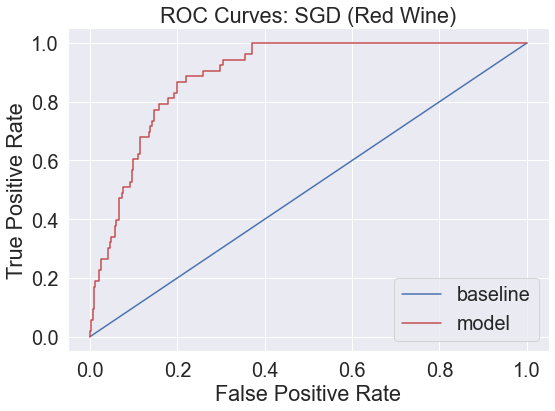

In [91]:
train_sgd_predictions_r = best_sgd_model_r.predict(Xr_train)
train_sgd_probs_r = best_sgd_model_r.predict_proba(Xr_train)[:, 1]
sgd_probs_r = best_sgd_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_sgd_model, yr_test, yr_train, sgd_probs_r, train_sgd_predictions_r, train_sgd_probs_r,title_name="SGD (Red Wine)")

In [92]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_sgd_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, sgd_probs_r)}')

Train ROC AUC Score: 0.8739248262047837
Test ROC AUC  Score: 0.8930455113914414


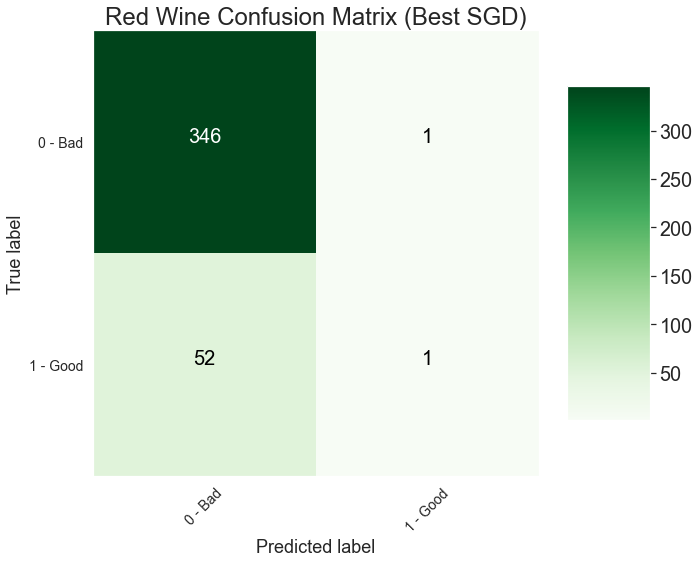

In [93]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_sgd_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best SGD)')

In [94]:
### Support Vector Classifier grid search

In [95]:
svc_r = SVC()
svc_r.fit(Xr_train, yr_train)
yr_pred_svc = svc_r.predict(Xr_test)

In [96]:
# Evaluate Random Forest Model
# Create base model to tune

pprint(svc_r.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [97]:
C = list(np.logspace(-2, 1, 15).astype(float))
gamma = ['scale', 'auto']
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
probability = [True, False]
svc_grid = {'C': C,
             'gamma': gamma,
             'kernel': kernel,
             'probability': probability
           }

In [98]:
# Create random search model and fit the data
svc_grid_r = GridSearchCV(
                        estimator = svc_r,
                        param_grid = svc_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
svc_grid_r.fit(Xr_train, yr_train)
svc_grid_r.best_params_
svc_grid_r.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   35.7s finished


{'C': 0.19306977288832497,
 'gamma': 'scale',
 'kernel': 'linear',
 'probability': True}

In [99]:
# Use the best model after tuning
best_svc_model_r = svc_grid_r.best_estimator_
best_svc_model_r.fit(Xr_train, yr_train)
yr_pred_best_svc_model = best_svc_model_r.predict(Xr_test)
pprint(best_svc_model_r.get_params())

{'C': 0.19306977288832497,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [100]:
print(classification_report(yr_test, yr_pred_best_svc_model))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       347
           1       0.00      0.00      0.00        53

    accuracy                           0.87       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.87      0.81       400



C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
print(confusion_matrix(yr_test, yr_pred_best_svc_model))

[[347   0]
 [ 53   0]]


C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall
            Baseline: 1.0
            Test: 0.0
            Train: 0.0
Precision
            Baseline: 0.13
            Test: 0.0
            Train: 0.0
Roc
            Baseline: 0.5
            Test: 0.85
            Train: 0.86


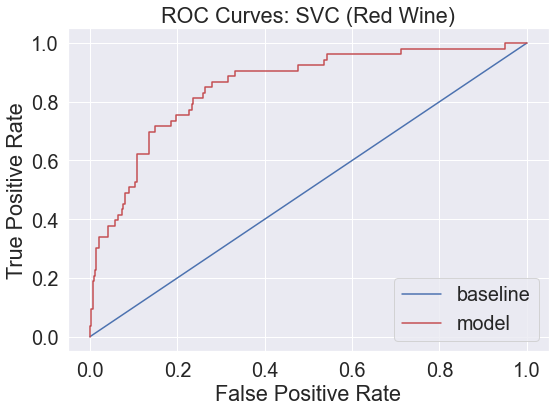

In [102]:
train_svc_predictions_r = best_svc_model_r.predict(Xr_train)
train_svc_probs_r = best_svc_model_r.predict_proba(Xr_train)[:, 1]
svc_probs_r = best_svc_model_r.predict_proba(Xr_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yr_pred_best_svc_model, yr_test, yr_train, svc_probs_r, train_svc_predictions_r, train_svc_probs_r, title_name="SVC (Red Wine)")

In [103]:
print(f'Train ROC AUC Score: {roc_auc_score(yr_train, train_svc_probs_r)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yr_test, svc_probs_r)}')

Train ROC AUC Score: 0.8587840226228349
Test ROC AUC  Score: 0.8523190691098907


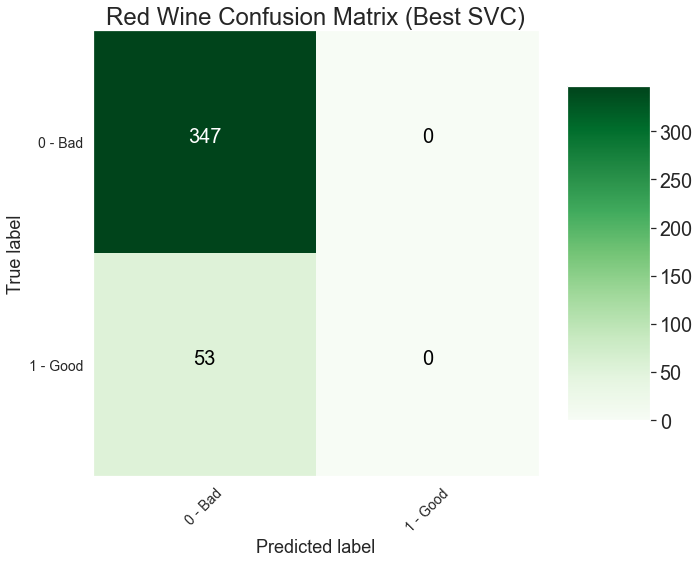

In [104]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yr_test, yr_pred_best_svc_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'Red Wine Confusion Matrix (Best SVC)')

In [105]:
## optimization of classifiers for White Wine

In [106]:
### random forest grid search

In [107]:
rfc_w = RFC(oob_score=True)
rfc_w.fit(Xw_train, yw_train)
yw_pred_rfc = rfc_w.predict(Xw_test)

In [108]:
# Create random search model and fit the data
rf_grid_w = GridSearchCV(
                        estimator = rfc_w,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid_w.fit(Xw_train, yw_train)
rf_grid_w.best_params_
rf_grid_w.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 39.5min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'n_jobs': 4}

In [109]:
# Use the best model after tuning
best_rf_model_w = rf_grid_w.best_estimator_
best_rf_model_w.fit(Xw_train, yw_train)
yw_pred_best_rf_model = best_rf_model_w.predict(Xw_test)
pprint(best_rf_model_w.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Recall
            Baseline: 1.0
            Test: 0.57
            Train: 1.0
Precision
            Baseline: 0.23
            Test: 0.85
            Train: 1.0
Roc
            Baseline: 0.5
            Test: 0.92
            Train: 1.0


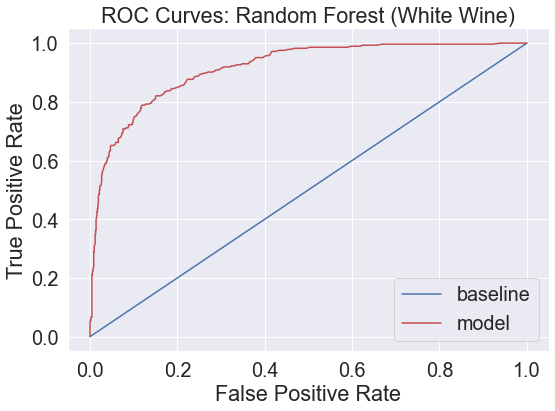

In [110]:
train_rf_predictions_w = best_rf_model_w.predict(Xw_train)
train_rf_probs_w = best_rf_model_w.predict_proba(Xw_train)[:, 1]
rf_probs_w = best_rf_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_rf_model, yw_test, yw_train, rf_probs_w, train_rf_predictions_w, train_rf_probs_w, title_name="Random Forest (White Wine)")

In [111]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_rf_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, rf_probs_w)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9150514136893625


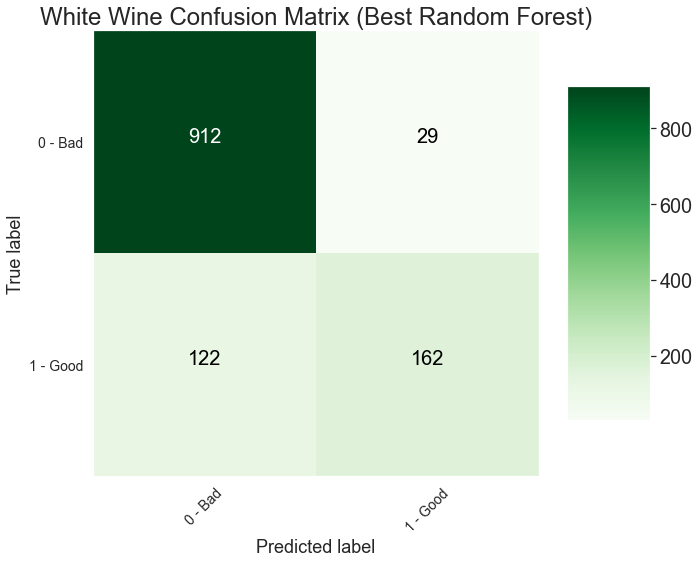

In [112]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_rf_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best Random Forest)')

In [113]:
### Stochastic Gradient Decent grid search

In [114]:
sgd_w = SGDC()
sgd_w.fit(Xw_train, yw_train)
yw_pred_sgd = sgd_w.predict(Xw_test)

In [115]:
# Create random search model and fit the data
sgd_grid_w = GridSearchCV(
                        estimator = sgd_w,
                        param_grid = sgd_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
sgd_grid_w.fit(Xw_train, yw_train)
sgd_grid_w.best_params_
sgd_grid_w.best_params_

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  1.0min finished


{'alpha': 0.001,
 'epsilon': 0.001,
 'l1_ratio': 0.1,
 'loss': 'log',
 'max_iter': 1000.0,
 'n_jobs': 4,
 'random_state': 42}

In [116]:
# Use the best model after tuning
best_sgd_model_w = sgd_grid_w.best_estimator_
best_sgd_model_w.fit(Xw_train, yw_train)
yw_pred_best_sgd_model = best_sgd_model_w.predict(Xw_test)
pprint(best_sgd_model_w.get_params())

{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.001,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 1000.0,
 'n_iter_no_change': 5,
 'n_jobs': 4,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [117]:
print(classification_report(yw_test, yw_pred_best_sgd_model))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       941
           1       0.60      0.38      0.47       284

    accuracy                           0.80      1225
   macro avg       0.72      0.65      0.67      1225
weighted avg       0.78      0.80      0.78      1225



In [118]:
print(confusion_matrix(yw_test, yw_pred_best_sgd_model))

[[868  73]
 [175 109]]


Recall
            Baseline: 1.0
            Test: 0.38
            Train: 0.36
Precision
            Baseline: 0.23
            Test: 0.6
            Train: 0.57
Roc
            Baseline: 0.5
            Test: 0.78
            Train: 0.79


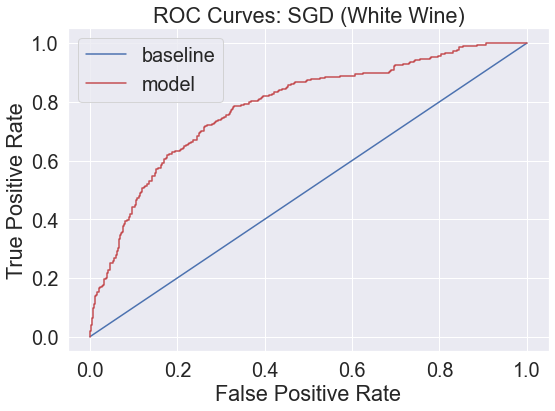

In [119]:
train_sgd_predictions_w = best_sgd_model_w.predict(Xw_train)
train_sgd_probs_w = best_sgd_model_w.predict_proba(Xw_train)[:, 1]
sgd_probs_w = best_sgd_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_sgd_model, yw_test, yw_train, sgd_probs_w, train_sgd_predictions_w, train_sgd_probs_w, title_name="SGD (White Wine)")

In [120]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_sgd_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, sgd_probs_w)}')

Train ROC AUC Score: 0.7913839058535492
Test ROC AUC  Score: 0.7833365763122839


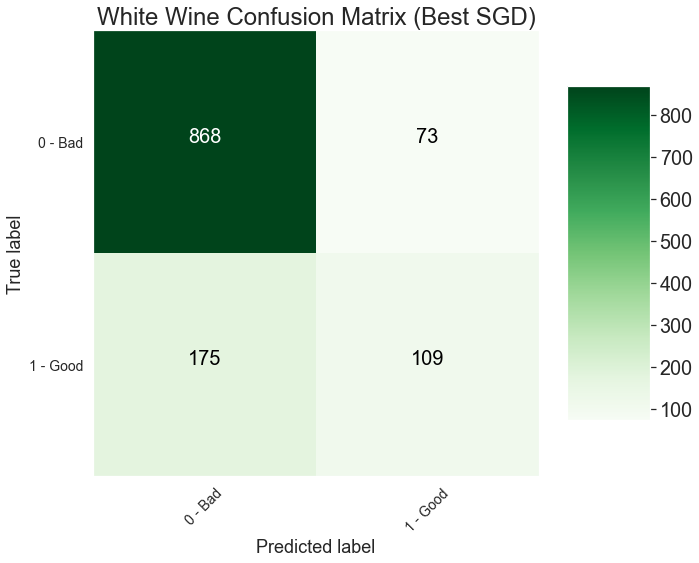

In [121]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_sgd_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best SGD)')

In [122]:
### Support Vector Classifier grid search

In [123]:
svc_w = SVC()
svc_w.fit(Xw_train, yw_train)
yw_pred_svc = svc_w.predict(Xw_test)

In [124]:
# Create random search model and fit the data
svc_grid_w = GridSearchCV(
                        estimator = svc_w,
                        param_grid = svc_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
svc_grid_w.fit(Xw_train, yw_train)
svc_grid_w.best_params_
svc_grid_w.best_params_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  7.6min finished


{'C': 2.2758459260747887,
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True}

In [125]:
# Use the best model after tuning
best_svc_model_w = svc_grid_w.best_estimator_
best_svc_model_w.fit(Xw_train, yw_train)
yw_pred_best_svc_model = best_svc_model_w.predict(Xw_test)
pprint(best_svc_model_w.get_params())

{'C': 2.2758459260747887,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [126]:
print(classification_report(yw_test, yw_pred_best_svc_model))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       941
           1       0.72      0.36      0.48       284

    accuracy                           0.82      1225
   macro avg       0.78      0.66      0.68      1225
weighted avg       0.81      0.82      0.79      1225



In [127]:
print(confusion_matrix(yw_test, yw_pred_best_svc_model))

[[902  39]
 [183 101]]


Recall
            Baseline: 1.0
            Test: 0.36
            Train: 0.43
Precision
            Baseline: 0.23
            Test: 0.72
            Train: 0.78
Roc
            Baseline: 0.5
            Test: 0.83
            Train: 0.9


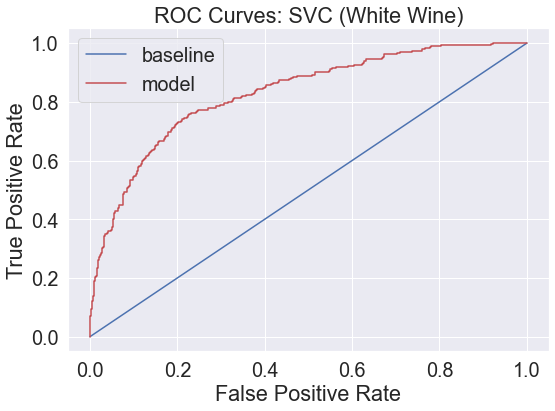

In [128]:
train_svc_predictions_w = best_svc_model_w.predict(Xw_train)
train_svc_probs_w = best_svc_model_w.predict_proba(Xw_train)[:, 1]
svc_probs_w = best_svc_model_w.predict_proba(Xw_test)[:, 1]
# Plot ROC curve and check scores
evaluate_model(yw_pred_best_svc_model, yw_test, yw_train, svc_probs_w, train_svc_predictions_w, train_svc_probs_w, title_name="SVC (White Wine)")

In [129]:
print(f'Train ROC AUC Score: {roc_auc_score(yw_train, train_svc_probs_w)}')
print(f'Test ROC AUC  Score: {roc_auc_score(yw_test, svc_probs_w)}')

Train ROC AUC Score: 0.9022740374863438
Test ROC AUC  Score: 0.8285836164703418


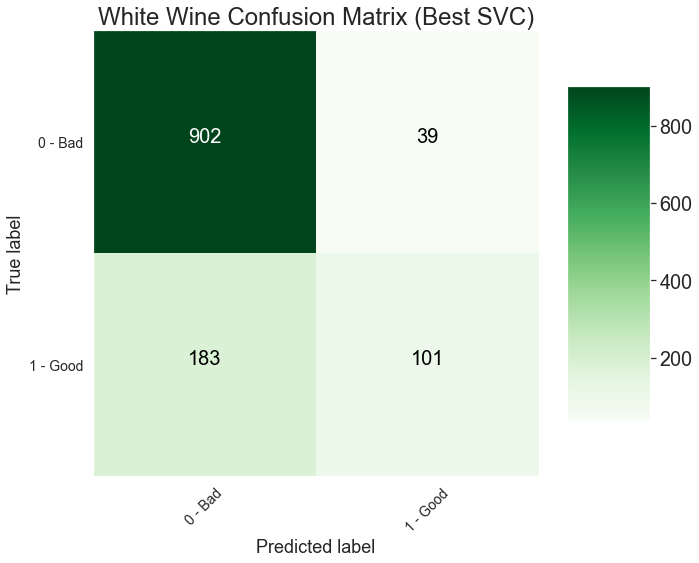

In [130]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(yw_test, yw_pred_best_svc_model), classes = ['0 - Bad', '1 - Good'],
                      title = 'White Wine Confusion Matrix (Best SVC)')

In [131]:
## Wine Quality Conclusions


In [132]:
## Red vs White Wine Classifer

In [133]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.625500
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.382605
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.304294
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.588374
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.059599


In [134]:
red_data['color'] = "red"
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.625500,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.382605,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.304294,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.588374,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.059599,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0.133925,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,0.315763,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,0.221096,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0.549175,red


In [135]:
white_data['color'] = "white"
white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,0.031327,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,0.926373,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,0.110162,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0.962464,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0.439759,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0.138737,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.241709,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0.099708,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.065574,white


In [136]:
wine_df = pd.concat([red_data, white_data], ignore_index=True)
wine_df.shape

(6497, 14)

In [137]:
wine_df.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [138]:
"""wine_data = wine_df
wine_data['color'] = pd.cut(wine_data['color'], bins=bins, labels=qual)
wine_data['color'] = label_quality.fit_transform(wine_data['color'])
wine_data['color'].value_counts()"""

"wine_data = wine_df\nwine_data['color'] = pd.cut(wine_data['color'], bins=bins, labels=qual)\nwine_data['color'] = label_quality.fit_transform(wine_data['color'])\nwine_data['color'].value_counts()"

In [139]:
data = wine_df#.drop('quality', axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.625500,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.382605,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.304294,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.588374,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.059599,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0.138737,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.241709,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0.099708,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.065574,white


In [140]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.196552,0.498218
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.397421,0.288995
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000176
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,0.249098
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,0.498313
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,0.747111
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,0.999695


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int32  
 12  random                6497 non-null   float64
 13  color                 6497 non-null   object 
dtypes: float64(12), int32(1), object(1)
memory usage: 685.4+ KB


In [142]:
## EDA for Wine Color

In [143]:
def plot_color_eda(col_name, df):
    
    """ Description: To take in numeric data column and plot them vs wine color 
        
        input: col_name: array of column name for the df excluding outcome variable
               df: dataframe that has the numeric data with the quality
    
        output: a plot for the relationship between the column and quality"""
    
    fig = plt.figure(figsize = (10,6))
    title = 'Wine color vs '+ col_name
    sns.barplot(x = 'color', y= col_name, data = df).set(title=title)
    plt.tight_layout()
    plt.savefig(p / (title+'.pdf') )
    return

In [144]:
eda_color_col = data.columns
eda_color_col = eda_color_col.drop(['random', 'color', 'quality'])
eda_color_col   

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

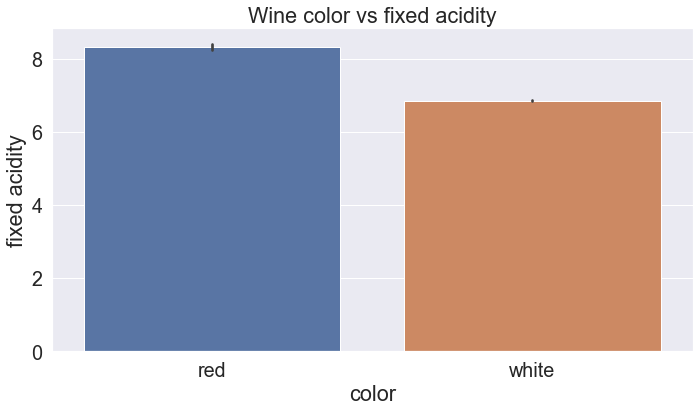

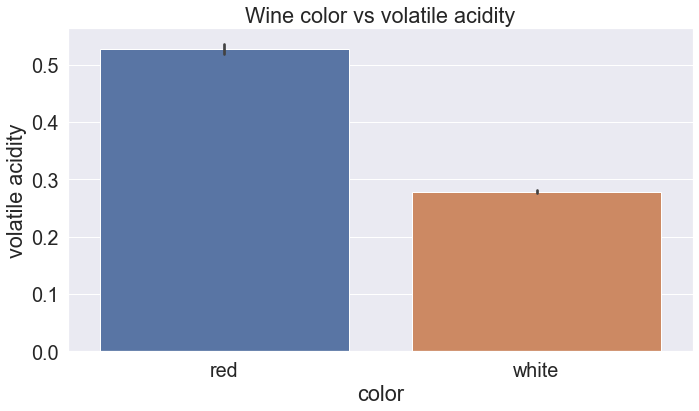

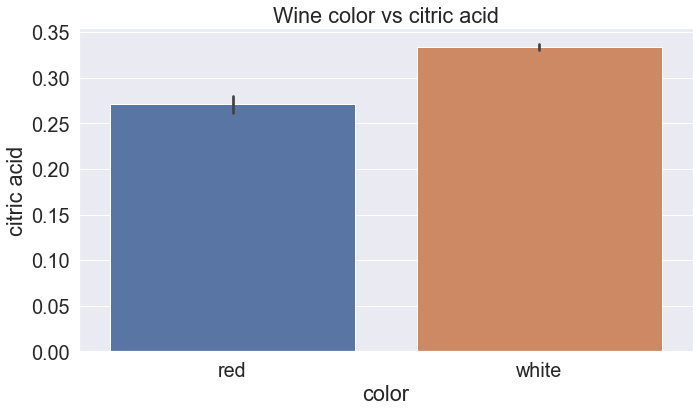

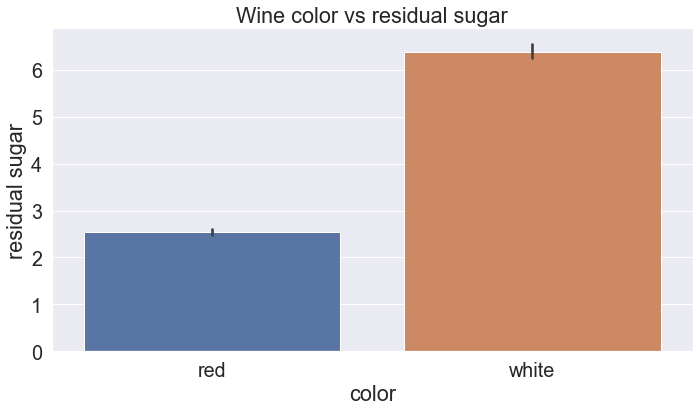

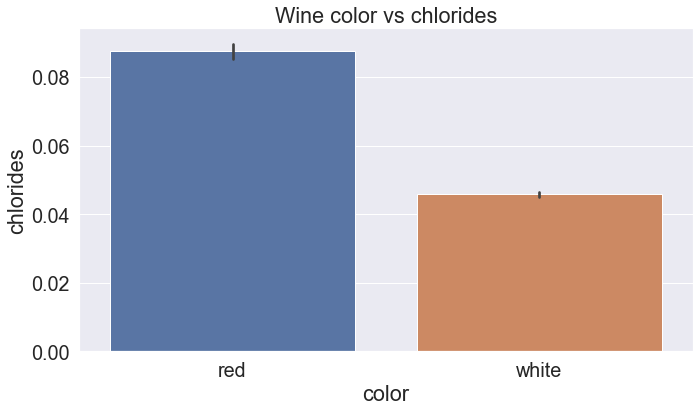

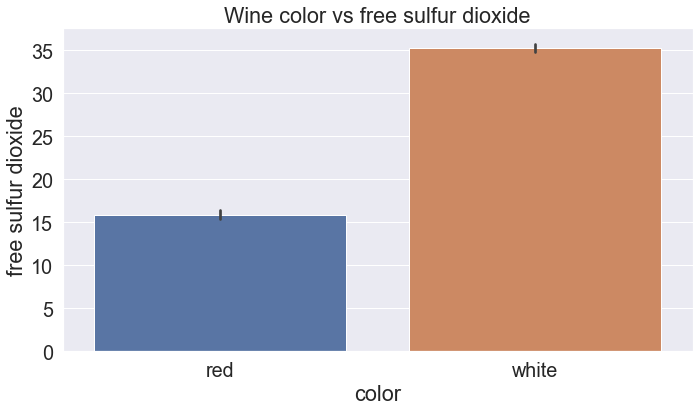

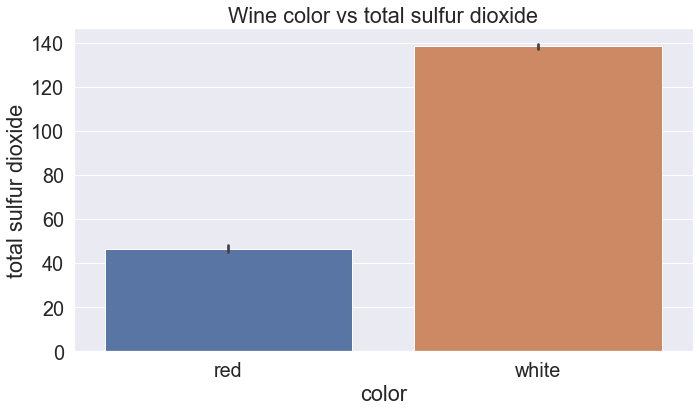

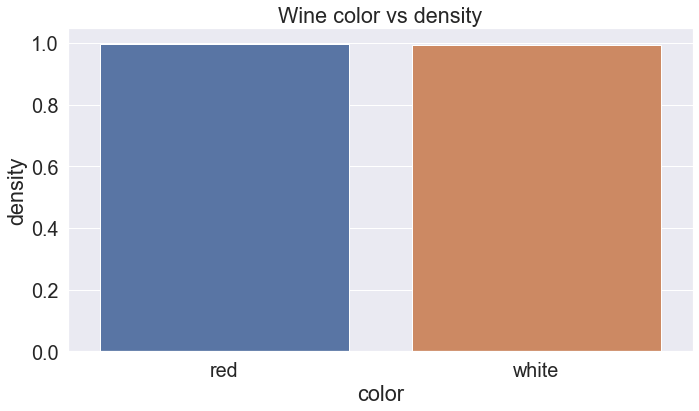

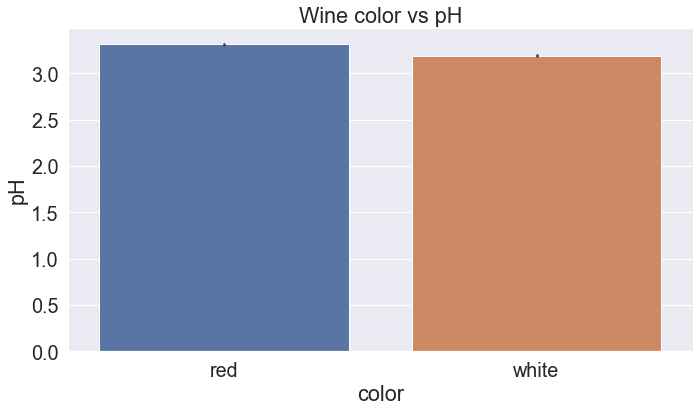

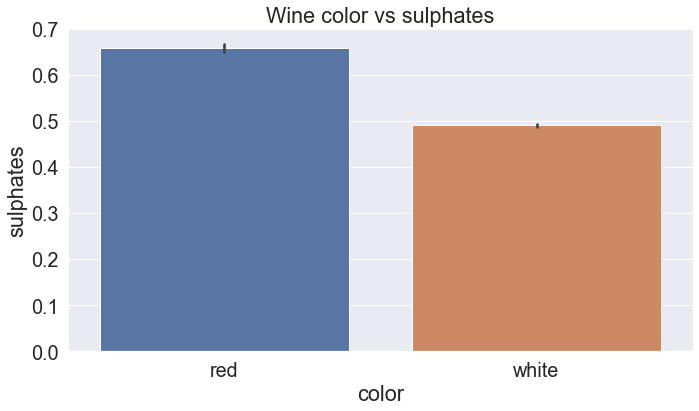

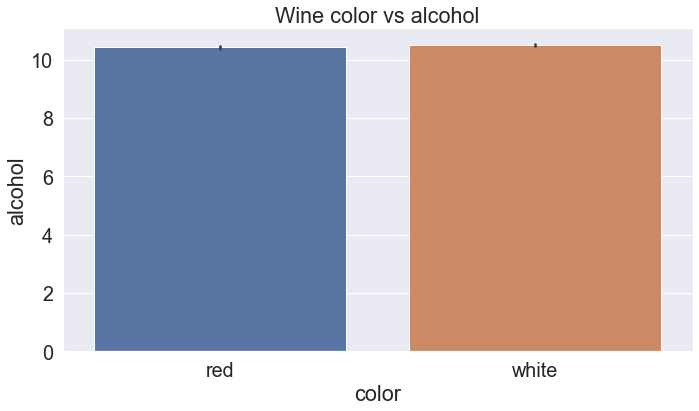

In [145]:
# plot each column vs quality of wine
for col in eda_color_col:
    plot_color_eda(col, data)

In [146]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,random,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.625500,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.382605,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.304294,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.588374,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.059599,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0.138737,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0.241709,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0.099708,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0.065574,white


In [151]:
temp_data = data
temp_data['color'] = label_quality.fit_transform(temp_data['color'])
temp_data['color'].value_counts()

1    4898
0    1599
Name: color, dtype: int64

In [152]:
#making a pi chart for the report
def plot_colorpiplot(data):
    acc_rate = round(data.color.mean(), 4)*100
    labels = 'White', 'Red'
    sizes = [acc_rate, 100-(acc_rate)]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1.1f%%', startangle=0)
    ax1.axis('equal')

    title = "Quantity of Each Wine Color"
    ax1.set_title(title)
    plt.savefig(p / (title+'.pdf') )
    plt.show()
    return

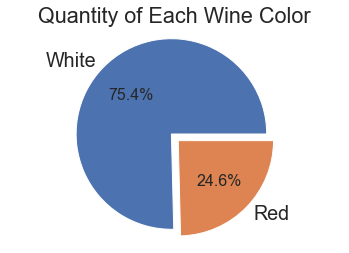

In [153]:
plot_colorpiplot(temp_data)

In [154]:
hm_data = data.drop(['random', 'density'], axis=1)
hm_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,1,1


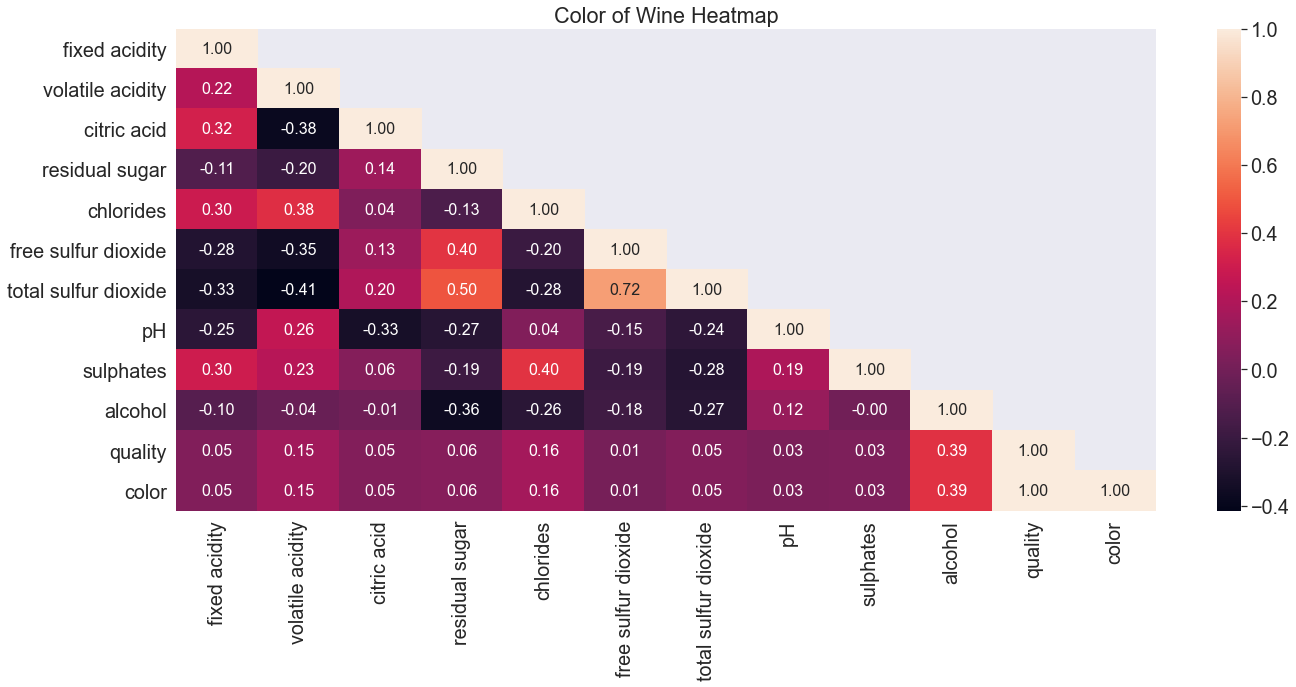

In [155]:
plot_heatmap(hm_data, "Color of")

In [156]:
X = data.drop(['color', 'density'], axis=1)
y = data['color']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [158]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,random
1539,7.2,0.390,0.32,1.80,0.065,34.0,60.0,3.46,0.78,9.9,0,0.064019
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,3.17,0.76,10.8,0,0.330430
100,8.3,0.610,0.30,2.10,0.084,11.0,50.0,3.40,0.61,10.2,0,0.173968
5477,6.5,0.350,0.31,10.20,0.069,58.0,170.0,3.18,0.49,9.4,0,0.975652
6416,5.8,0.385,0.25,3.70,0.031,38.0,122.0,3.20,0.63,11.2,0,0.274981
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,3.15,0.54,9.2,0,0.716052
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,3.35,0.44,10.7,1,0.163381
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,3.24,0.43,9.5,0,0.877122
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,3.18,0.47,9.5,0,0.013521


In [159]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()  

In [160]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [161]:
X_train

array([[ 2.11284802e-03,  3.32462696e-01, -1.83218163e-03, ...,
        -4.94217715e-01, -4.99871713e-01, -1.50478871e+00],
       [ 2.79891768e+00,  8.27735349e-01,  7.59332762e-01, ...,
         2.59076212e-01, -4.99871713e-01, -5.83893179e-01],
       [ 8.56692104e-01,  1.69446249e+00, -1.40225808e-01, ...,
        -2.43119739e-01, -4.99871713e-01, -1.12473032e+00],
       ...,
       [-6.19399338e-01,  2.08644533e-01, -8.32193938e-01, ...,
        -8.29015016e-01, -4.99871713e-01,  1.30584594e+00],
       [-5.41710315e-01, -4.72355364e-01,  1.24371045e+00, ...,
        -8.29015016e-01, -4.99871713e-01, -1.67934354e+00],
       [ 2.11284802e-03,  1.75637157e+00, -1.80094932e+00, ...,
        -8.29015016e-01, -4.99871713e-01, -3.27744724e-01]])

In [162]:
## Feature Importance for Wine Color

In [163]:
rfc = RFC(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [164]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       434
           1       0.99      1.00      1.00      1191

    accuracy                           0.99      1625
   macro avg       1.00      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [165]:
print(confusion_matrix(y_test, y_pred_rfc))

[[ 425    9]
 [   1 1190]]


In [166]:
accuracy_score(y_test, y_pred_rfc)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred_rfc),4)*100} %")

The accuracy of the model is 99.38 %


In [167]:
train_probs = rfc.predict_proba(X_train)[:,1] 
probs = rfc.predict_proba(X_test)[:, 1]
train_predictions = rfc.predict(X_train)

In [168]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9989146710931062


In [169]:
#evaluate_model(y_pred_rfc, y_test, y_train, probs, train_predictions, train_probs, title_name="Color Feature Importance")

In [170]:
confusion_matrix(y_test, y_pred_rfc, normalize='all')

array([[2.61538462e-01, 5.53846154e-03],
       [6.15384615e-04, 7.32307692e-01]])

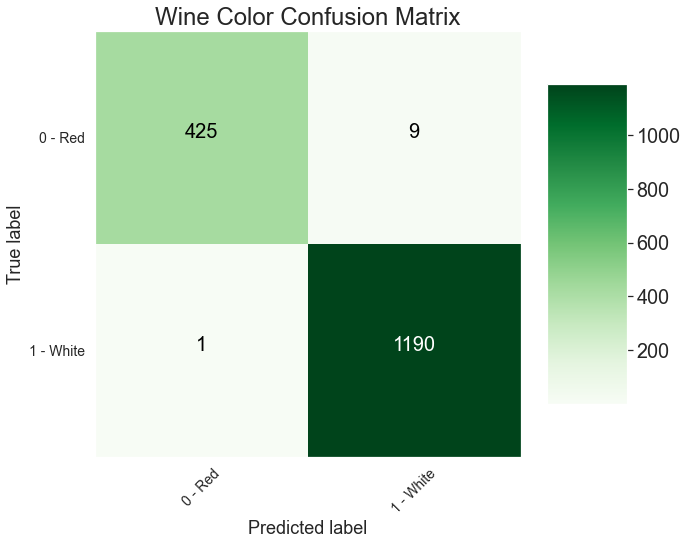

In [171]:
# Let's plot
cm = confusion_matrix(y_test, y_pred_rfc)
plot_confusion_matrix(cm, classes = ['0 - Red', '1 - White'],
                      title = 'Wine Color Confusion Matrix')

Random Forest Feature Importance

In [172]:
print(rfc.feature_importances_)
print(f" There are {len(rfc.feature_importances_)} features in total")

[0.05202238 0.12763712 0.03055546 0.04053371 0.29354645 0.04868194
 0.3024089  0.02474262 0.06254055 0.01001333 0.00095222 0.00636532]
 There are 12 features in total


In [173]:
rfc.feature_importances_

array([0.05202238, 0.12763712, 0.03055546, 0.04053371, 0.29354645,
       0.04868194, 0.3024089 , 0.02474262, 0.06254055, 0.01001333,
       0.00095222, 0.00636532])

In [174]:
color_col_names = X.columns
feature_importances = list(zip(color_col_names, rfc.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
#[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
feature_importances

[('fixed acidity', 0.052022378868076265),
 ('volatile acidity', 0.12763711890613183),
 ('citric acid', 0.030555464926170048),
 ('residual sugar', 0.040533712554442006),
 ('chlorides', 0.29354645093702103),
 ('free sulfur dioxide', 0.048681940170889074),
 ('total sulfur dioxide', 0.30240890240941576),
 ('pH', 0.024742618861846314),
 ('sulphates', 0.0625405507563903),
 ('alcohol', 0.010013329484897256),
 ('quality', 0.0009522168576383422),
 ('random', 0.006365315267081676)]

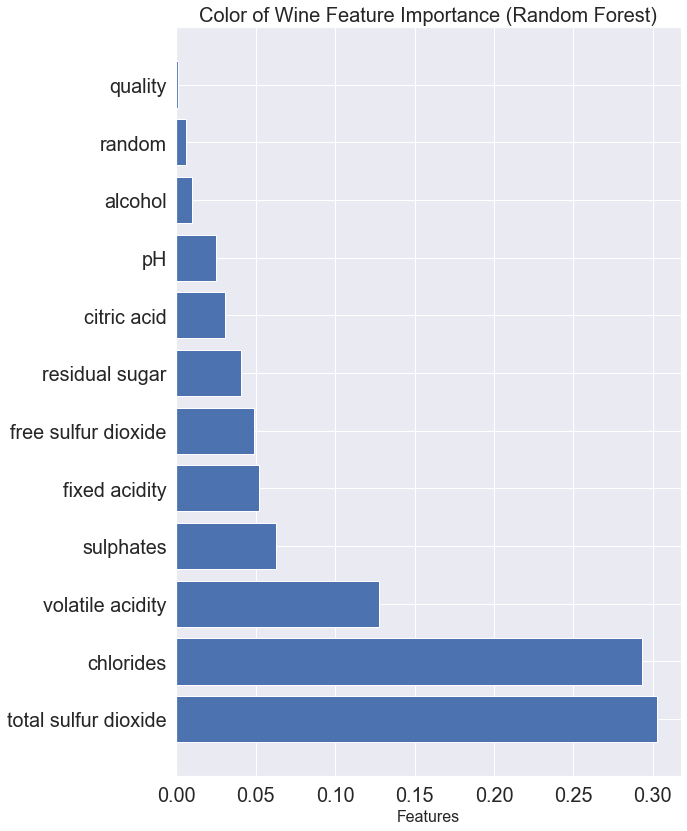

In [175]:
plot_feature_importance(feature_importances_ranked, "Color of")

In [176]:
### random forest grid search

In [177]:
rfc = RFC(oob_score=True)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [178]:
# Create random search model and fit the data
rf_grid = GridSearchCV(
                        estimator = rfc,
                        param_grid = random_grid,
                        cv = 5,
                        verbose=1, 
                        scoring='roc_auc')
rf_grid.fit(Xr_train, yr_train)
rf_grid.best_params_
rf_grid.best_params_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 27.1min finished


{'bootstrap': True,
 'max_depth': 55,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'n_jobs': 4}

In [179]:
# Use the best model after tuning
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf_model = best_rf_model.predict(X_test)
pprint(best_rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 55,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 4,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [180]:
train_rf_predictions = best_rf_model.predict(X_train)
train_rf_probs = best_rf_model.predict_proba(X_train)[:, 1]
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]
# Plot ROC curve and check scores

#evaluate_model(y_pred_best_rf_model, y_test, y_train, rf_probs, train_rf_predictions, train_rf_probs, title_name="Random Forest (Color of Wine)")

In [181]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, rf_probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9991120036216323


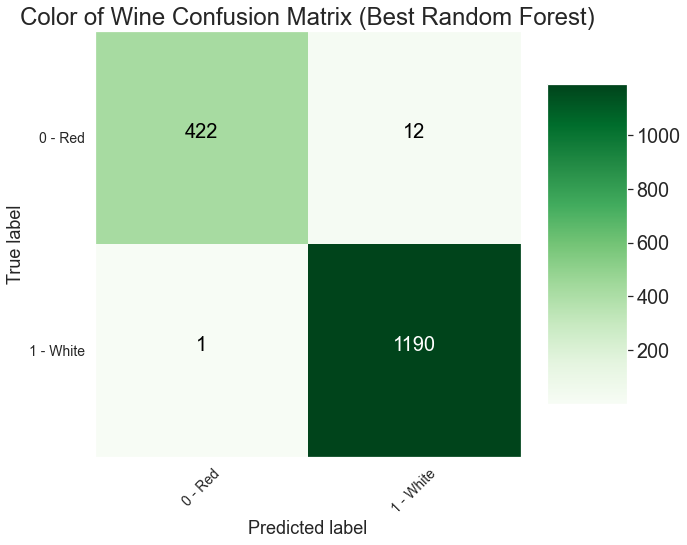

In [182]:
# Plot Confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_best_rf_model), classes = ['0 - Red', '1 - White'],
                      title = 'Color of Wine Confusion Matrix (Best Random Forest)')